# Wykresy


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(1000)

figSize = (10, 6)


In [57]:
width = 10

def defaultPlotSettings(fig, ax, title='', xlabel='', ylabel='', leg=True, grid=True):
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xlim((0 , width + 1))
    ax.set_ylim((-1.5 , 1.5))
    ax.legend(loc='upper right')
    return fig, ax

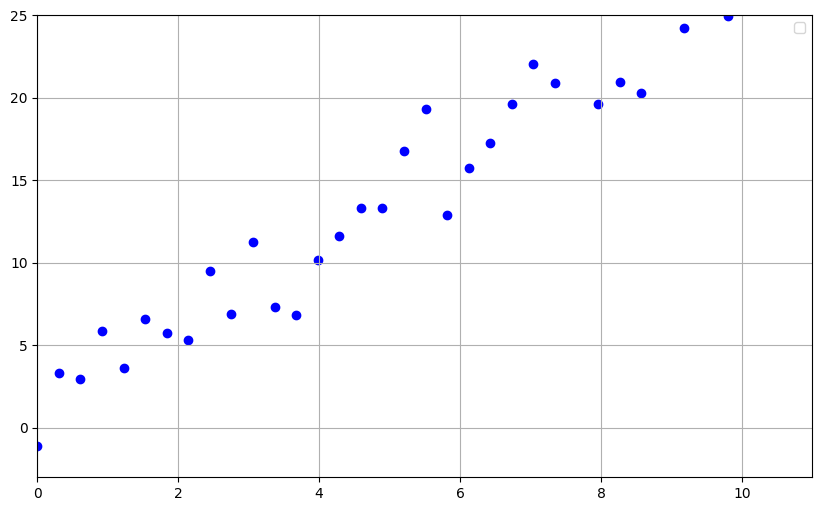

In [58]:
x_linear = np.linspace(0, 15, 50)
x_linear_reshaped = x_linear.reshape(-1, 1)
y_linear_true = 2.5 * x_linear + 1.5
noise = np.random.normal(0, 3.2, size=x_linear.shape)
y_linear = y_linear_true + noise

model = LinearRegression()
model.fit(x_linear_reshaped, y_linear)
y_linear_pred = model.predict(x_linear_reshaped)


fig,ax = plt.subplots(figsize=figSize)

ax.scatter(x_linear, y_linear, color='blue', label='Obserwacje')


defaultPlotSettings(fig, ax, xlabel='', ylabel='')
ax.set_xlim((0 , width + 1))
ax.set_ylim((-3 , 25))
ax.legend('')

fig.savefig('../pres/images/wykres1.png', dpi=300)



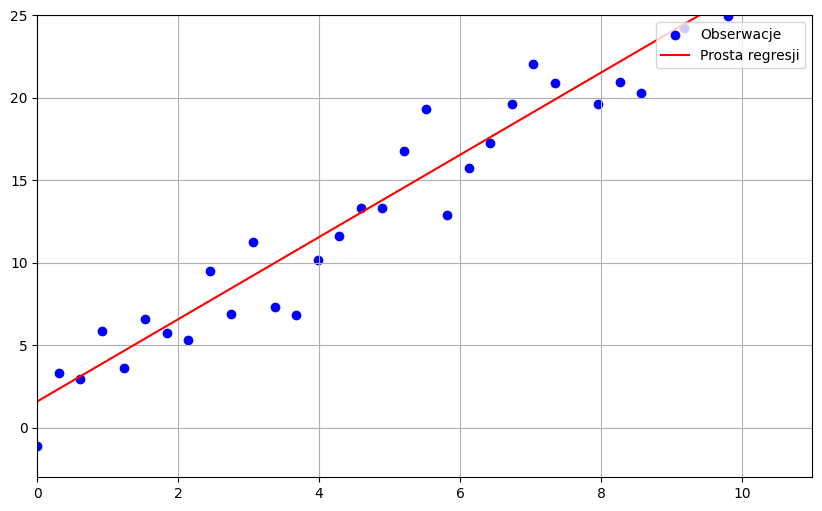

In [59]:
ax.plot(x_linear, y_linear_pred, color='red', label='Prosta regresji')

ax.legend(loc='upper right')

fig.savefig('../pres/images/wykres2.png', dpi=300)
fig

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
C:\Users\dyrcz\AppData\Local\Temp\ipykernel_14416\2030186800.py:1: SyntaxWarning: invalid escape sequence '\e'
  ax.plot([x_linear[0], x_linear[0]], [y_linear[0], y_linear_pred[0]], color='green', linestyle='--', linewidth=1, label="$\epsilon_i$")


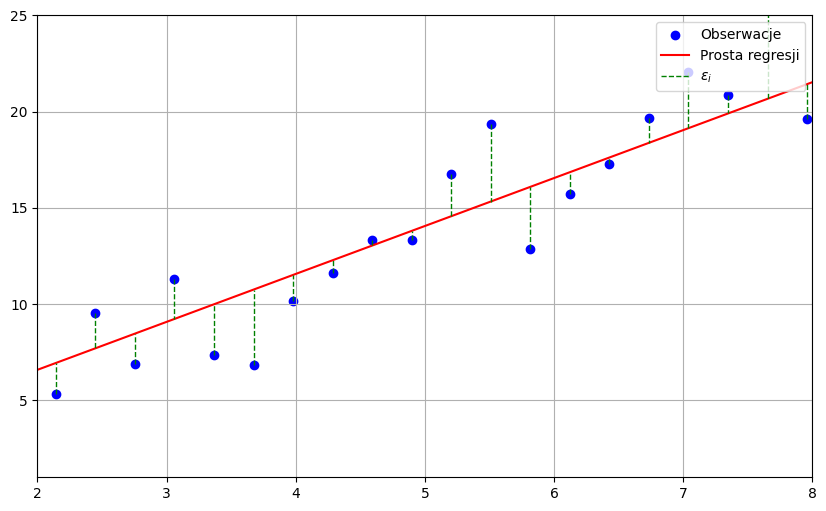

In [60]:
ax.plot([x_linear[0], x_linear[0]], [y_linear[0], y_linear_pred[0]], color='green', linestyle='--', linewidth=1, label="$\epsilon_i$")
for xi, yi, ypi in zip(x_linear, y_linear, y_linear_pred):
    ax.plot([xi, xi], [yi, ypi], color='green', linestyle='--', linewidth=1)
ax.legend(loc='upper right')
fig.savefig('../pres/images/wykres3.png', dpi=300)

ax.set_xlim((2,8))
ax.set_ylim((1 , 25))
fig

In [61]:

# Default Value for every plot

width = 10
num_points = width * 10


x = np.linspace(0.1, width + 1, num_points)
y = np.sin(x) + 0.5 * np.sin(3 * x) + 0.2 * np.sin(7 * x) + 0.1 * np.random.randn(num_points)
x_reshaped = x.reshape(-1, 1)
# x_dense = np.linspace(0.1, width + 1, num_points*10)



<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\l'
C:\Users\dyrcz\AppData\Local\Temp\ipykernel_14416\3056310201.py:19: SyntaxWarning: invalid escape sequence '\l'
  ax2.plot(a[0] + np.exp(x) * a[1], label='Regresja funkcją $\ln(x)$')


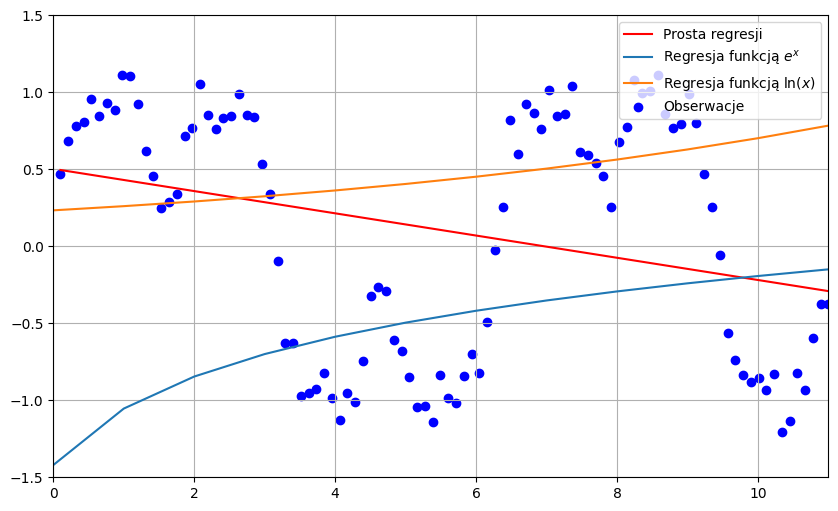

In [62]:

model = LinearRegression()
model.fit(x_reshaped, y)
y_pred = model.predict(x_reshaped)

x = np.linspace(0.1, width + 1, num_points)
y = np.sin(x) + 0.5 * np.sin(3 * x) + 0.2 * np.sin(7 * x) + 0.1 * np.random.randn(num_points)
x_reshaped = x.reshape(-1, 1)



# Wykres danych
fig2, ax2 = plt.subplots(1, figsize=figSize)
ax2.plot(x, y_pred, color='red', label='Prosta regresji')

a = np.polyfit(np.exp(x), y, 1)
b = np.polyfit(np.log(x), y, 1)

ax2.plot(b[0] + np.log(x) * b[1], label='Regresja funkcją $e^x$')
ax2.plot(a[0] + np.exp(x) * a[1], label='Regresja funkcją $\ln(x)$')


ax2.scatter(x, y, color='blue', label='Obserwacje')
# title='Dane trudne do przybliżenia funkcją elementarną'
defaultPlotSettings(fig2, ax2 )
ax2.legend(loc='upper right')
# ax2.set_ylim((-2 , 2))

# fig.savefig('regresja.png', dpi=300)

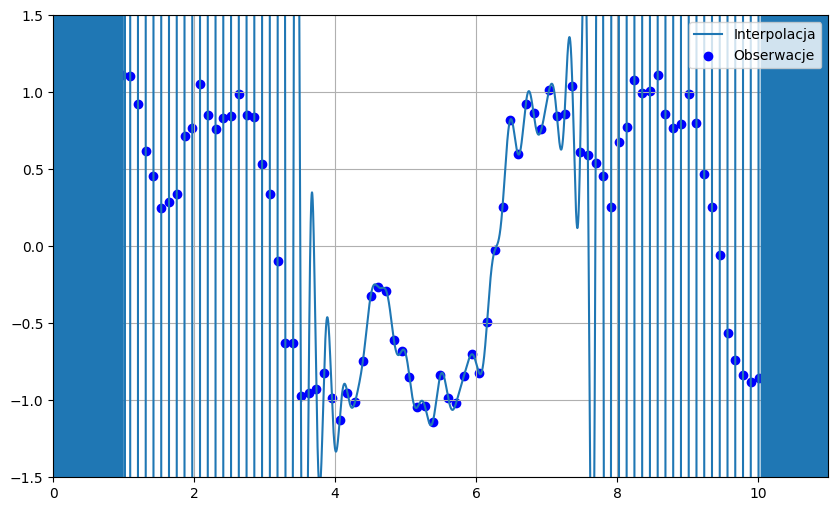

In [63]:
from scipy.interpolate import BarycentricInterpolator


interpolator = BarycentricInterpolator(x, y)

x_dense = np.linspace(0, 12, 90000)
y_dense = interpolator(x_dense)


fig3, ax3 = plt.subplots(1, figsize=figSize)


ax3.plot(x_dense, y_dense, label="Interpolacja")
ax3.scatter(x, y, color='blue', label='Obserwacje')
defaultPlotSettings(fig3, ax3)

ax3.set_xlim((0 , width + 1))
# ax3.set_ylim((-2 , 2))
ax3.legend(loc='upper right')
ax3.grid(True)



c:\Users\dyrcz\anaconda3\Lib\site-packages\numpy\lib\_polynomial_impl.py:656: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
c:\Users\dyrcz\anaconda3\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\dyrcz\AppData\Local\Temp\ipykernel_14416\990348470.py:2: RankWarning: Polyfit may be poorly conditioned
  wsp = np.polyfit(x, y, 250)


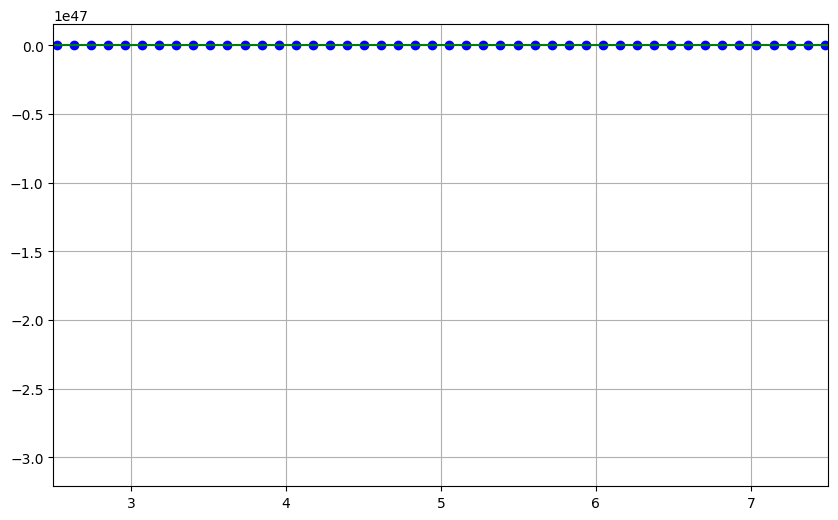

In [64]:
# Dopasowanie wielomianu stopnia 3
wsp = np.polyfit(x, y, 250)
p = np.poly1d(wsp)  # obiekt funkcyjny

# Wykres
xx = np.linspace(min(x)-5, width + 10, 700)
fig4, ax4 = plt.subplots(1, figsize=figSize)
ax4.plot(xx, p(xx), color='green', label='Wielomian')
ax4.scatter(x, y, label='Obserwacje', c='blue')
ax4.set_xlim(2.5, 7.5)
# ax4.set_ylim(-3, 3)
ax4.grid()
# ax4.legend()
# display(p)
# fig4


In [65]:
import numpy as np
import matplotlib.pyplot as plt

# --- Definicja funkcji jądra ---
def rbf_kernel(x1, x2, gamma, type='gaussian'):
    """
    Funkcja jądra RBF (Radial Basis Function).
    K(x1, x2) = exp(||x1 - x2||^2/(2gamma ^2))
    """
    if x1.ndim == 1:
        x1 = x1.reshape(-1, 1)
    if x2.ndim == 1:
        x2 = x2.reshape(-1, 1)
    
    # Obliczanie kwadratu odległości euklidesowej
    # Dla x1 (m, d) i x2 (n, d) -> dist (m, n)
    # Tutaj zakładamy, że x1 i x2 są skalarami lub wektorami 1D dla uproszczenia
    # Jeśli x1 i x2 są skalarami:
    if x1.shape[1] == 1 and x2.shape[1] == 1:
        # Broadcasting do obliczenia (x1_i - x2_j)^2
        # x1_col jako (n_samples_x1, 1)
        # x2_row jako (1, n_samples_x2)
        x1_col = x1
        x2_row = x2.T # Transpozycja, aby uzyskać (1, n_samples_x2)
        
        # ||x_i - x_j||^2 = x_i^2 - 2x_i x_j + x_j^2
        # Dla RBF, używamy ||x - y||^2. Jeśli x, y są skalarami, to (x-y)^2
        # W przypadku gdy x1 jest wektorem (N,1) a x2 jest skalarem (1,1),
        # chcemy K(x1_i, x2_scalar) dla każdego i.
        # Lub K(x1_scalar, x2_i)
        
        # Jeśli x1 to zbiór punktów (do predykcji), a x2 to punkty treningowe
        if x1.shape[0] > 1 and x2.shape[0] > 1 : # Obliczanie macierzy Grama K(X,X)
             sq_dist = np.sum(x1**2, axis=1).reshape(-1, 1) + np.sum(x2**2, axis=1) - 2 * np.dot(x1, x2.T)
        elif x1.shape[0] == 1 and x2.shape[0] > 1: # K(x_new, X_train)
             sq_dist = (x1 - x2.T)**2 # x1 jest (1,1), x2.T jest (1, N_train) -> (1, N_train)
             sq_dist = np.sum(sq_dist, axis=0).reshape(1,-1) # Suma po wymiarach cech (tutaj 1)
        elif x1.shape[0] > 1 and x2.shape[0] == 1: # K(X_pred, x_train_single)
             sq_dist = (x1 - x2.T)**2 # x1 jest (N_pred, 1), x2.T jest (1,1) -> (N_pred, 1)
             sq_dist = np.sum(sq_dist, axis=1).reshape(-1,1) # Suma po wymiarach cech
        else: # Oba są skalarami
            sq_dist = (x1-x2)**2
            
    else: # Ogólny przypadek dla wielowymiarowych x1, x2 (jeśli byłyby potrzebne)
        # Używamy scipy.spatial.distance.cdist dla wydajności i prostoty
        from scipy.spatial.distance import cdist
        sq_dist = cdist(x1, x2, 'sqeuclidean')

    if(type == 'gaussian'):
        return gausian_kernel(sq_dist, gamma)
    elif(type == 'laplace'):
        return laplace_kernel(sq_dist, gamma)

    return gausian_kernel(sq_dist, gamma)

def laplace_kernel(distance, gamma):
    return np.exp(-distance / gamma)

def gausian_kernel(distance, gamma):
    return np.exp(-distance / (2 * gamma**2))
# --- Generowanie przykładowych danych ---
# np.random.seed(42)
# X_train = np.linspace(0,11,200).reshape(-1, 1) # Punkty x od -5 do 5
# # Prawdziwa funkcja: y = sin(x) + szum
# y_train = np.sin(X_train).ravel() + np.random.randn(n_samples) * 0.3

num_points= 3
n_samples = num_points

x_test = np.linspace(0, 2, num_points)
y_test = [-1,2,1]
x_reshaped = x_test.reshape(-1, 1)
x_dense = np.linspace(0, 50, 100000)
# --- Parametry modelu ---
gamma = 0.5  # Parametr jądra RBF
lambda_reg = 0.1 # Parametr regularyzacji (lambda)

# --- Obliczanie macierzy Grama ---
# K_ij = K(X_train_i, X_train_j)


# --- Definicja funkcji predykcyjnej ---
def predict(X_new, X_train, alpha, gamma_kernel):
    """
    Predykcja f(X_new) = sum_i alpha_i * K(X_new, X_train_i)
    """
    if X_new.ndim == 1:
        X_new = X_new.reshape(-1,1)
        
    # K_new_train_i_j = K(X_new_i, X_train_j)
    kernel_matrix = rbf_kernel(X_new, X_train, gamma_kernel)
    
    # Predykcja to K_new_train @ alpha
    # (n_new_samples, n_train_samples) @ (n_train_samples,) -> (n_new_samples,)
    return kernel_matrix @ alpha

def make_prediction(x, y, gamma, lambda_reg, X_plot):
    """
    Oblicza predykcję dla danych x_reshaped i y przy użyciu jądra RBF.
    
    Parametry:
    - x_reshaped: Punkty treningowe (n_samples x d)
    - y: Wartości odpowiadające punktom (n_samples,)
    - gamma: Parametr jądra RBF
    - lambda_reg: Parametr regularyzacji (lambda)
    
    Zwraca:
    - y_pred: Predykcja dla gęstszej siatki punktów
    """
    x_reshaped = x.reshape(-1, 1)


    K_gram = rbf_kernel(x_reshaped, x_reshaped, gamma)

    n = x_reshaped.shape[0]
    I = np.eye(n)
    
    try:
        alpha = np.linalg.solve(K_gram + lambda_reg * I, y)
    except np.linalg.LinAlgError:
        
        print("Macierz osobliwa, używam pinv.")
        alpha = np.linalg.pinv(K_gram + lambda_reg * I) @ y


    return (predict(X_plot, x_reshaped, alpha, gamma), alpha)



# --- Przygotowanie danych do wykresów ---
X_plot = np.linspace(x_reshaped.min() - 1, x_reshaped.max() + 1, 200).reshape(-1, 1)
colors = ['orange', 'blue', 'green', 'purple', 'brown']
gamma = 0.5  # Parametr jądra RBF

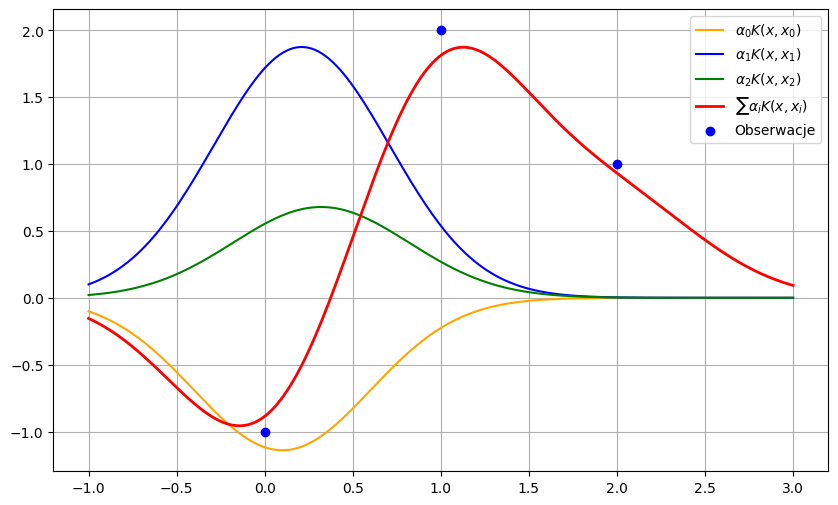

In [66]:

fig8, ax8 = plt.subplots(figsize=figSize)

y_pred_plot, alpha = make_prediction(x_test, y_test, gamma, 0.1, X_plot)
for i in range(n_samples):

    kernel_values_for_xi = rbf_kernel(X_plot, x[i:i+1], gamma)
    individual_func_component = alpha[i] * kernel_values_for_xi.ravel()
    ax8.plot(X_plot.ravel(), individual_func_component,c=colors[i], label=f'$\\alpha_{i} K(x, x_{i})$' if i < 5 else None) # Pokaż legendę tylko dla kilku pierwszych


if n_samples > 5:
     ax8.legend(loc='upper right')
else:
    ax8.legend(loc='upper right')
ax8.grid(True)



ax8.plot(X_plot.ravel(), y_pred_plot, color='red', linewidth=2, label='$ \\sum{\\alpha_{i}K(x,x_i)}$')
ax8.scatter(x_reshaped.ravel(), y_test, color='blue', zorder=5, label='Obserwacje')
ax8.legend(loc='upper right')

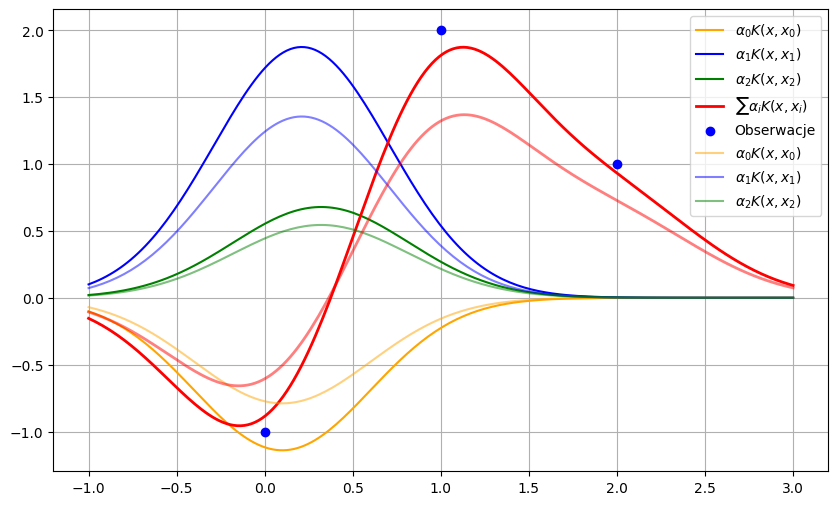

In [67]:
num_points= 3
x_test = np.linspace(0, 2, num_points)
y_test = [-1,2,1]
x_reshaped = x_test.reshape(-1, 1)
x_dense = np.linspace(0, 50, 100000)
# --- Parametry modelu ---



# --- Obliczanie macierzy Grama ---
# K_ij = K(X_train_i, X_train_j)
# K_gram = rbf_kernel(x_reshaped, x_reshaped, gamma)

# # --- Obliczanie współczynników alpha ---
# # alpha = (K + lambda * I)^-1 * y
# n = x_reshaped.shape[0]
# I = np.eye(n)
# try:
#     alpha = np.linalg.solve(K_gram + lambda_reg * I, y_test)
# except np.linalg.LinAlgError:
    
#     print("Macierz osobliwa, używam pinv.")
#     alpha = np.linalg.pinv(K_gram + lambda_reg * I) @ y_test


y_pred_plot,alpha = make_prediction(x_reshaped, y_test, gamma, 0.5, X_plot)

for i in range(n_samples):
    kernel_values_for_xi = rbf_kernel(X_plot, x[i:i+1], gamma)
    individual_func_component = alpha[i] * kernel_values_for_xi.ravel()
    ax8.plot(X_plot.ravel(), individual_func_component,c=colors[i],alpha=0.5, label=f'$\\alpha_{i} K(x, x_{i})$' if i < 5 else None) # Pokaż legendę tylko dla kilku pierwszych



if n_samples > 5:
    #  title="Pierwsze 5 komponentów i dane"
     ax8.legend(loc='upper right')
else:
    ax8.legend(loc='upper right')
ax8.grid(True)


lambda_reg = 0.5


ax8.plot(X_plot.ravel(), y_pred_plot, color='red', linewidth=2, label='$ \\sum{\\beta_{i}K(x,x_i)}$', alpha=0.5)

fig8

C:\Users\dyrcz\AppData\Local\Temp\ipykernel_14416\2019957165.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right')


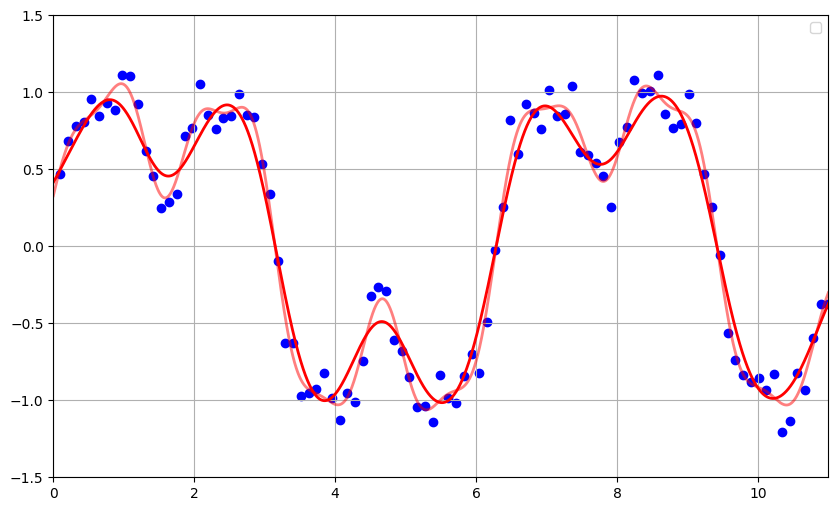

In [68]:
x_reshaped = x.reshape(-1, 1)
x_dense = np.linspace(0, 50, 100000)
# --- Parametry modelu ---
gamma = 0.5  # Parametr jądra RBF
lambda_reg = 0.1 # Parametr regularyzacji (lambda)

# --- Obliczanie macierzy Grama ---
# K_ij = K(X_train_i, X_train_j)
y_pred_plot2, alpha2 = make_prediction(x_reshaped, y, gamma, 0.5, x_dense)
y_pred_plot3, alpha3 = make_prediction(x_reshaped, y, gamma, 0.01, x_dense)

fig9, ax9 = plt.subplots(figsize=figSize)

defaultPlotSettings(fig9, ax9)
ax9.plot(x_dense.ravel(), y_pred_plot2, color='red', linewidth=2, label='$ \\sum{\\beta_{i}K(x,x_i)}$')
ax9.plot(x_dense.ravel(), y_pred_plot3, color='red', alpha=0.5, linewidth=2, label='$ \\sum{\\beta_{i}K(x,x_i)}$')
ax9.scatter(x, y, color='blue', label='Obserwacje')

C:\Users\dyrcz\AppData\Local\Temp\ipykernel_14416\2019957165.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right')


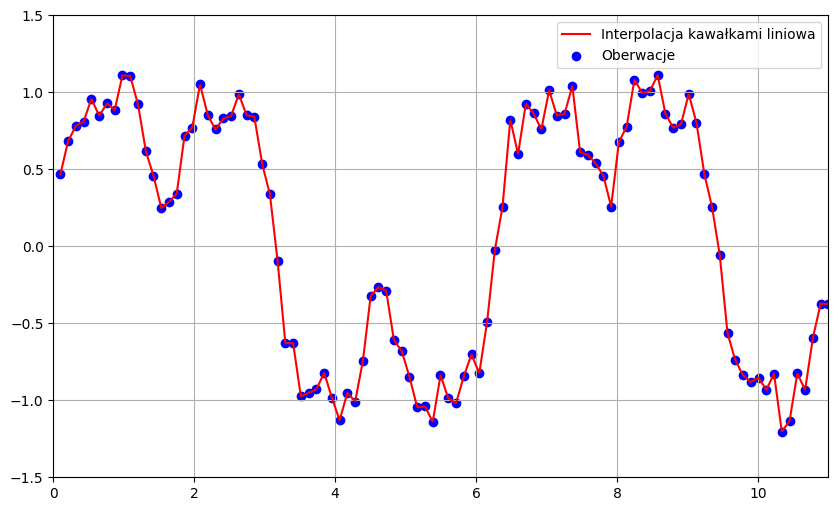

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d



# Tworzymy funkcję interpolacyjną (liniową)
f = interp1d(x, y, kind='linear')

# Generujemy gęstsze punkty do rysowania wykresu
x_dense = np.linspace(min(x), max(x), 1500)
y_dense = f(x_dense)

# Rysujemy wykres
fig10, ax10 = plt.subplots(figsize=figSize)
defaultPlotSettings(fig10, ax10)
ax10.plot(x_dense, y_dense,c='red', label='Interpolacja kawałkami liniowa')
ax10.scatter(x, y, color='blue', label='Oberwacje')
ax10.legend(loc='upper right')
ax10.grid(True)
# plt.show()


In [70]:
# fig.savefig('wykres.png', dpi=300)
fig2.savefig('../pres/images/wykres4.png', dpi=300)
fig3.savefig('../pres/images/wykres5.png', dpi=300)
fig8.savefig('../pres/images/wykres6.png', dpi=300)
fig9.savefig('../pres/images/wykres7.png', dpi=300)
fig10.savefig('../pres/images/wykres8.png', dpi=300)

In [71]:
def trigonometric_function(x):
    
    n_points = len(x)
    deg = n_points/2


    if(n_points % 2 == 0):
        deg -= 0.5
    points = x * np.pi / n_points
    
        

C:\Users\dyrcz\AppData\Local\Temp\ipykernel_14416\2019957165.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right')


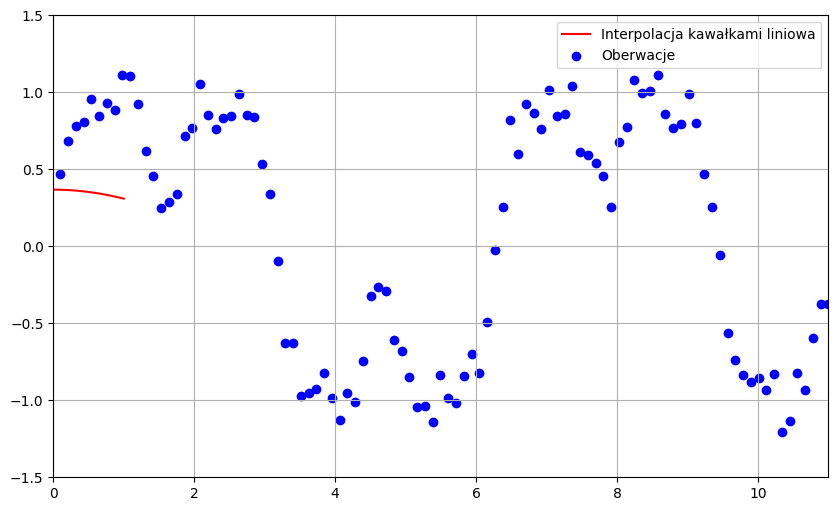

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Ustawienie ziarna losowości dla powtarzalności
np.random.seed(0)

# Tworzenie osi X
# x = np.linspace(0, 10, 500)

# Funkcja z losowymi fluktuacjami




# Rysowanie wykresu
# x_dense = np.linspace(min(x), max(x), 1500)

def f(x):
    return np.exp(-1) * np.sin(x)/x
y_dense = f(x_dense)

# Rysujemy wykres
fig11, ax11 = plt.subplots(figsize=figSize)
defaultPlotSettings(fig11, ax11)
ax11.plot(x_dense, y_dense,c='red', label='Interpolacja kawałkami liniowa')
ax11.scatter(x, y, color='blue', label='Oberwacje')
ax11.legend(loc='upper right')
ax11.grid(True)


C:\Users\dyrcz\AppData\Local\Temp\ipykernel_14416\2019957165.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right')


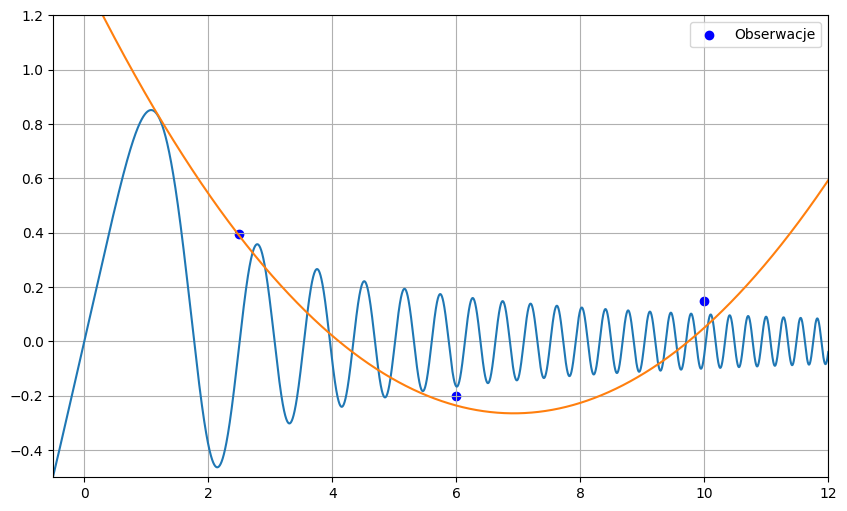

In [123]:
from scipy.interpolate import BarycentricInterpolator


interpolator = BarycentricInterpolator(x, y)
interpolator2 = BarycentricInterpolator([2.5, 6, 10], [0.395, -.2, .15])

x_dense = np.linspace(-1, 100, 90000)
y_dense =  np.sin(x_dense**2)/x_dense
x2 = [2.5, 6, 10]

def quadratic_function(x:list):
    arr = []
    a = 1/30
    for i in x:
        arr.append(a*i**2 + b*i + c)
    return arr



fig3, ax3 = plt.subplots(1, figsize=figSize)
y_dense2 = quadratic_function(x_dense)

ax3.plot(x_dense, y_dense)
ax3.plot(x_dense, y_dense2, label="")
# ax3.scatter(x, y, color='blue', label='Obserwacje')
defaultPlotSettings(fig3, ax3)
# ax3.set_xlim((0 , width + 1))
ax3.set_ylim((-.5 , 1.2))
ax3.set_xlim((-.5 , 12))
ax3.scatter([2.5, 6, 10], [0.395, -.2, .15], color='blue', label='Obserwacje')
ax3.legend(loc='upper right')
ax3.grid(True)

fig3.savefig('../pres/images/wykres9.png', dpi=300)


In [ ]:
import numpy as np

# Dane
x = np.array([2.5, 6, 10])
y = np.array([0.395, -0.2, 0.15])

# Macierz układu równań
A = np.vstack([x**2, x, np.ones_like(x)]).T

# Rozwiązanie układu Ax = y
a, b, c = np.linalg.solve(A, y)

print(a, b, c)

def quadratic_function(x:list):
    arr = []
    a = 1/3
    for i in x:
        arr.append(a*i**2 + b*i + c)
    return arr


0.03433333333333332 -0.4618333333333332 1.3349999999999997
